<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/Spatial_Domain_Filtering_Low_Pass_and_Median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

Low Pass Filtering in Spatial Domain

In [ ]:
#Low Pass SPatial Domain Filtering to observe the blurring effect
img= cv2.imread('/content/Test.tif',0) #Read the image
m,n=img.shape #Obtain number of rows and columns of the image 

In [ ]:
print(m,n)

500 500


In [ ]:
#Develop Averaging filter(3,3) mask

mask= np.ones([3,3],dtype=int)
print(mask)
mask=mask/9

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [ ]:
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
#Convolve/Correlation the 3X3 mask over the image 

img_new=img.copy()
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
        img_new[i,j]=temp
        
#img_new=img_new.astype(np.uint8)
cv2.imwrite('blurred.png',img_new)

True

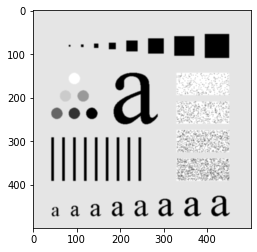

In [ ]:
#Blurred image with 3x3 Mask
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)

In [ ]:
# Spatial domain low pass filtering for a variable size mask- Generalized program
img_gen= np.zeros([m,n], dtype=int)
b= int(input("Enter size of the mask: "))
a=b//2

for i in range(a,m-a):
    for j in range(a,n-a):
        temp= img[i-a:i+a+1,j-a:j+a+1] 
        
        constant= np.sum(temp)
        img_gen[i,j]= constant//b**2

            

Enter size of the mask: 35


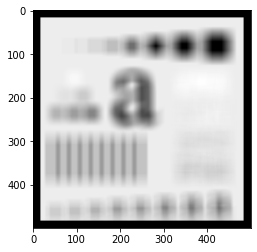

In [ ]:
#Show the blurred image
plt.imshow(img_gen,cmap="gray" )

Median Filtering

In [ ]:
# Median filtering on the image with salt and pepper noise
img1= cv2.imread('/content/noisysaltpepper.tif',0) #Read the image
m,n=img1.shape #Obtain number of rows and columns of the image 


In [ ]:

#Median filtering with 3X3 mask over the image 

img_median=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= [img1[i-1,j-1], img1[i-1,j] ,img1[i-1,j+1],img1[i,j-1],img1[i,j],img1[i,j+1],img1[i+1,j-1],img1[i+1,j],img1[i+1,j+1]]
        
        img_median[i,j]=np.median(temp)
#img_new=img_new.astype(np.uint8)
cv2.imwrite('pcbnew.png',img_median)

True

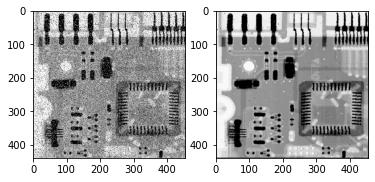

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_median, cmap="gray")

In [ ]:
# Median filtering for a variable size mask- Generalized program
img_genm= np.zeros([m,n], dtype=int)
b= int(input("Enter size of the mask: "))
a=b//2
for i in range(a,m-a):
    for j in range(b,n-a):
      try:
        temp=[]
        temp= img1[i-a:i+a+1,j-a:j+a+1]
      

        img_genm[i,j]= np.median(temp)
      except ValueError:
        pass
#print(temp)
    


Enter size of the mask: 15


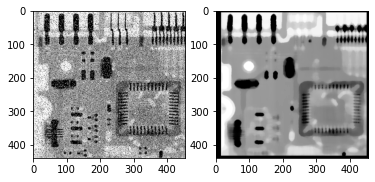

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_genm, cmap="gray")